In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
train = pd.read_csv('datos.csv',header=0)
train.head(20)

,X1,X2,Y
0,3.45,4.22,1
1,-2.12,-1.24,0
2,-4.11,-3.13,0
3,0.05,-1.00,0
4,1.26,2.30,1
5,3.15,3.43,1
6,3.74,2.74,1
7,1.45,1.14,1
8,3.21,3.87,1
9,-2.53,-1.97,0


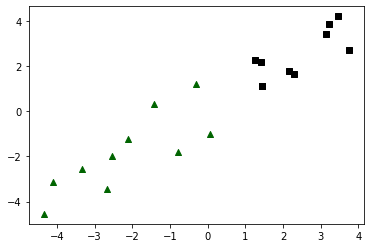

In [34]:
plt.scatter(train.X1[train.Y== 0], train.X2[train.Y== 0],c='darkgreen',marker='^')
plt.scatter(train.X1[train.Y== 1], train.X2[train.Y== 1],c='black',marker=',')

In [29]:
SVM = SVC(kernel = 'linear',C=0.5)
X_train = train.loc[:,train.columns !='Y']
Y_train = train.Y
SVM.fit(X_train,Y_train)
print(SVM.coef_)
print(SVM.intercept_)
print(SVM.decision_function(X_train))

[[1.0569469  0.24311883]]
[-0.80972847]
[ 3.86269978 -3.35192324 -5.91474215 -0.99999996  1.08119792  3.35355183
  3.80939851  0.99999999  3.52394093 -3.96274822 -2.24336451 -4.94931465
  1.22599754  2.01425718  1.91416662  0.97886105 -6.50306868 -4.46567427
 -2.07419213 -0.8537777 ]


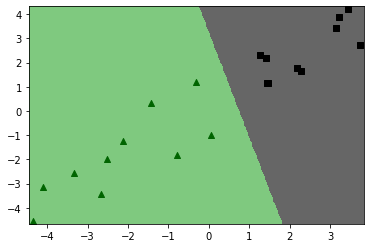

In [30]:
x_min, x_max = train.X1.min() - .1, train.X1.max() + .1
y_min, y_max = train.X2.min() - .1, train.X2.max() + .1
h = .02

xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = SVM.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx,yy,Z,cmap = plt.cm.Accent,shading='auto')

plt.scatter(train.X1[train.Y== 0], train.X2[train.Y== 0],c='darkgreen',marker='^')
plt.scatter(train.X1[train.Y== 1], train.X2[train.Y== 1],c='black',marker=',')